# Imports

In [1]:
from queue import PriorityQueue as priority_queue
import random
import numpy as np
import pandas as pd
import functools
import time
import seaborn as sb
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import Any
import heapq
sb.set()

## Timer Decorator

In [2]:
def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start = time.perf_counter()
        value = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"Time taken to run the function: {elapsed} seconds")
        return value
    return wrapper_timer

## Array implementation of Priority Queue

In [3]:
# PQ should be implemented adding in tuples (vertex, weight)
class PriorityQueue(object):
    def __init__(self):
        self.queue = []
  
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
  
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
  
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
        # self.queue.sort(key=lambda tup: tup[1])
  
    # for popping an element based on smallest dist
    def extractCheapest(self):
        try:
            minimum = 0
            min_tuple = self.queue[minimum]
            minimum_initial = min_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare < minimum_initial:
                    minimum_initial = to_compare
                    minimum = i
            item = self.queue[minimum]
            del self.queue[minimum]
            return item
        except IndexError:
            print()
            exit()
    
    def delete(self):
        try:
            maximum = 0
            max_tuple = self.queue[maximum]
            maximum_initial = max_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare > maximum_initial:
                    maximum_initial = to_compare
                    maximum = i
            item = self.queue[maximum]
            del self.queue[maximum]
            return item
        except IndexError:
            print()
            exit()
    
    def peek(self): 
        return self.queue[0]

# TESTING PRIORITY QUEUE
if __name__ == '__main__':
    myQueue = PriorityQueue()
    myQueue.insert((12, 1))
    myQueue.insert((7, 4))
    myQueue.insert((14, 3))
    myQueue.insert((1, 2)) 
    print(myQueue)            
    while not myQueue.isEmpty():
        # print(myQueue.extractCheapest())
        print(myQueue.delete()) 

(12, 1) (7, 4) (14, 3) (1, 2)
(7, 4)
(14, 3)
(1, 2)
(12, 1)


## Array implementation of Priority Queue ver 2

In [4]:
class handmade_prio_q():
    def __init__(self):
        self.array = []
    
    def add_object(self, item, priority):
        temp_tuple = (item, priority)
        self.array.append(temp_tuple)
        self.array.sort(key = lambda x: x[1])

    def del_object(self, item):
        index = 0
        for i in self.array:
            if (i[0] == item):
                self.array.pop(index)
                return
            index += 1
    
    def is_empty(self):
        return not bool(len(self.array))

# Matrix Graph

In [5]:
# class Graph_0: 

#     # Constructor 
#     def __init__(self, vertices):
#         self.V = vertices # number of vertices 
#         self.graph = [[float('inf') for column in range(vertices)] for row in range(vertices)] # creates the matrix 

#     # Method to add edges 
#     def add_edge(self, u, v, dist):
#         self.graph[u][v] = dist
#         # self.graph[v][u] = dist

#     # Shortest path algo 
#     def dijkstra_shortest_path(self, start): 
#         dist = [float('inf')] * self.V
#         pi = [-1] * self.V
#         Set = [False] * self.V 
        
#         dist[start] = 0
#         priority_queue = PriorityQueue()

#         # put everything into a pq 
#         for i in range(self.V):
#             priority_queue.insert((i ,self.graph[i][0]))
#         # print(priority_queue)
        

#         while not priority_queue.isEmpty():
#             # u = self.find_min(dist, Set)
#             # print(priority_queue)
#             current_tuple = priority_queue.extractCheapest()
#             # print(current_tuple)
#             u = current_tuple[0]
#             # print(u+1)
#             # print(Set)
#             # print(dist)
#             Set[u] = True 
            

#             for neighbour in range(self.V):
#                 # If it is a neighbour
#                 # and not yet visited 
#                 if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
#                     # ERROR WITH DELETING NEIGHBOURS 
#                     priority_queue.delete()
#                     # print(u, neighbour, dist[neighbour])

#                     dist[neighbour] = dist[u] + self.graph[u][neighbour]
#                     pi[neighbour] = u + 1
#                     priority_queue.insert((neighbour, dist[neighbour]))
                

 
#         self.printSolution(dist)
#             # print(pi)

#     def printSolution(self, dist):
#         print ("Vertex \tDistance from Source")
#         for node in range(self.V):
#             print (node, "\t", dist[node])

In [6]:
# Graph Class with jovian's prio queue, currently working

class Graph: 

    # Constructor 
    def __init__(self, vertices):
        self.V = vertices # number of vertices 
        self.graph = [[float('inf') for column in range(vertices + 1)] for row in range(vertices + 1)] # creates the matrix  # 0,0 is offset node 0 is offset
        self.pi = []
        self.edge = 0

    # Method to add edges 
    def add_edge(self, u, v, dist):
        self.graph[u][v] = dist
        self.edge += 1

    # Shortest path algo
    # @timer
    def dijkstra_shortest_path(self, start = 1, print = True):
        start_time = time.perf_counter()
        dist = [float('inf')] * (self.V + 1)
        pi = [None] * (self.V + 1)
        Set = [False] * (self.V + 1) 
        
        dist[start] = 0
        pq = handmade_prio_q()

        # put everything into a pq 
        for i in range(1, self.V + 1):
            pq.add_object(i, self.graph[i][0])    

        while not pq.is_empty():

            current_tuple = pq.array[0]
            pq.del_object(pq.array[0][0])        
            u = current_tuple[0]
            Set[u] = True 
            

            for neighbour in range(1, self.V + 1):
                # If it is a neighbour
                # and not yet visited 
                if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
                    pq.del_object(neighbour)
                    dist[neighbour] = dist[u] + self.graph[u][neighbour]
                    pi[neighbour] = u
                    pq.add_object(neighbour, dist[neighbour])
                

        end = time.perf_counter()
        time_taken = end - start_time
        self.pi = pi
        if print:
            self.printSolution(dist)

        return dist, time_taken

    def printSolution(self, dist):
        print("----------------------------------------------------------")
        print(f"Matrix implementation of graph, with {self.V} vertices and {self.edge} edges")
        print ("|Vertex\t\t\t\t|Distance from Source\t\t\t\t|Previous node")
        for node in range(1, self.V+1):
            print(f"|{node}\t\t\t\t|{dist[node]}\t\t\t\t|{self.pi[node]}")
        print("----------------------------------------------------------")



## Linked List Implementation

In [12]:
class node:
    def __init__(self, data_value = None, weight = 0, index = None, next_node = None):
        self.data_value = data_value # value
        self.index = index # for indexing in linked list
        self.weight = weight # for weighted graphs
        self.next_node = next_node # to point to next node

class linked_list:
    def __init__(self):
        self.size = 0
        self.head = None
        self.tail = None
    
    def append(self, number):
        temp = node(data_value = number, index = self.size) # insert at the end, so insert at size
        if (self.head == None): # first node
            self.head = temp 
            self.tail = self.head
        else:
            self.tail.next_node = temp
            self.tail = self.tail.next_node
        self.size += 1

    def print_list(self):
        temp = self.head
        while (temp != None): # traverse down the list
            print(f"{temp.data_value}", end = "")
            if (temp.weight != 0): # for graph printing
                print(f"/W:{temp.weight}", end = "")
            print(" -> ", end = "")
            temp = temp.next_node
        print("")

    def contains(self, value): # checks if a value exists in a list
        temp = self.head;
        while temp:
            if temp.data_value == value:
                return True
            else:
                temp = temp.next_node

        return False

    def find_index(self, value): # get index of a value in a list
        if (self.contains(value)):
            temp = self.head
            while temp:
                if (temp.data_value == value):
                    return temp.index
                else:
                    temp = temp.next_node

    def node_at(self, index): # get node at index in a list
        if (index >= self.size):
            print("No such node")
            return None

        temp = self.head;
        while (temp.index != index):
            temp = temp.next_node

        return temp


    def remove_at(self, index): # remove node at certain index
        if (index >= self.size): # too lazy to deal with removing head node
            print("No such node")
            return
        elif (index == 0):
            self.dequeue()
            return
        
        temp = self.node_at(index-1)
        temp.next_node = self.node_at(index).next_node
        self.size -= 1
    
    def pop(self):
        self.remove_at(self.size - 1)
    
    def dequeue(self):
        self.head = self.head.next_node

## Min Heap Implementation

In [43]:
class min_heap_prio:
    def __init__(self):
        first_element = node(None, float('inf'),0) # data_value, priority, index
        self.max_size = 1000
        self.array = [first_element] * self.max_size
        self.size = 0
        self.dict = {} # node.data_value : index
        
    
    def get_parent(self, curr_index):
        return curr_index // 2
    
    def has_parent(self, curr_index):
        return self.get_parent(curr_index) >= 1

    def get_left(self, curr_index):
        return curr_index * 2

    def has_left(self, curr_index):
        return self.get_left(curr_index) <= self.size

    def get_right(self, curr_index):
        return (curr_index * 2) + 1
    
    def has_right(self, curr_index):
        return self.get_right(curr_index) <= self.size
    
    def check_is_leaf(self, curr_index):
        if (curr_index >= self.size//2 and curr_index <= self.size):
            return True
        return False

    def prio_of(self, curr_index):
        return self.array[curr_index].weight

    def swap(self, first_index, second_index):
        first_node = self.array[first_index]
        second_node = self.array[second_index]
        # swap in the heap itself
        self.array[first_index], self.array[second_index] = self.array[second_index], self.array[first_index]

        # update index dict
        self.dict[first_node.data_value], self.dict[second_node.data_value] = self.dict[second_node.data_value], self.dict[first_node.data_value]

        # update the nodes' index attribute
        self.array[first_index].index, self.array[second_index].index = self.array[second_index].index, self.array[first_index].index

    def heapify_down(self):
        curr_index = 1
        while (self.has_left(curr_index)):
            smaller_index = self.get_left(curr_index)

            if (self.has_right(curr_index) and self.prio_of(self.get_right(curr_index)) < self.prio_of(self.get_left(curr_index))):
                smaller_index = self.get_right(curr_index)

            if (self.prio_of(curr_index) < self.prio_of(smaller_index)):
                break
            else:
                self.swap(curr_index, smaller_index)
            
            curr_index = smaller_index
    
    def heapify_up(self):
        curr_index = self.size
        while (self.has_parent(curr_index) and self.prio_of(self.get_parent(curr_index)) > self.prio_of(curr_index)):
            self.swap(self.get_parent(curr_index), curr_index)
            curr_index = self.get_parent(curr_index)

    def add_object(self, data_value, priority):
        self.size += 1
        index = self.size
        temp_node = node(data_value, priority, index)
        self.array[index] = temp_node
        self.dict[data_value] = index

        self.heapify_up()
        
    def get_min(self):
        to_return = self.array[1]
        self.swap(1, self.size)
        self.size -= 1
        self.heapify_down()
        return to_return

    def get_specific(self, data_value):
        index = self.dict[data_value]
        to_return = self.array[index]
        self.swap(index, self.size)
        self.size -= 1
        self.heapify_down()
        # self.heapify_up()
        return to_return
    
    def is_empty(self):
        return not self.size

# Linked List Graph

In [44]:
class list_graph:
    def __init__(self, vertices = 0):
        self.vertices = vertices
        self.edges = 0
        temp = [None]
        for i in range(1, vertices+1):
            temp_list = linked_list()
            temp_list.append(i)
            temp.append(temp_list)
        self.list = temp
    
    def add_edge(self, vertex_one, vertex_two, weight = 1):
        flag = False
        if (not self.list[vertex_one].contains(vertex_two)): # is there already an edge from one to two
            flag = True
            self.list[vertex_one].append(vertex_two) # add two to linked list
            self.list[vertex_one].node_at(self.list[vertex_one].size - 1).weight = weight # get node of two in one's linked list. set weight to weight. (one/weight = 0) -> (two/weight = weight)

        if (flag):
            self.edges += 1
        else: # update weights
            index = self.list[vertex_one].find_index(vertex_two)
            self.list[vertex_one].node_at(index).weight = weight

    def print_graph(self):
        for i in range(1, self.vertices + 1):
            self.list[i].print_list()

    # @timer
    # def dijkstra(self, source = 1, print = True):
    #     start = time.perf_counter()
    #     known_distance = [float('inf')] * (self.vertices + 1)
    #     previous_node = [None] * (self.vertices + 1)
    #     visited = [0] * (self.vertices + 1)

    #     known_distance[source] = 0
    #     prio_queueueue = handmade_prio_q()
    #     for i in range(1, self.vertices + 1):
    #         prio_queueueue.add_object(i, known_distance[i])

    #     while not prio_queueueue.is_empty():
    #         current_tuple = prio_queueueue.array[0]
    #         current_vertex = current_tuple[0]
    #         prio_queueueue.del_object(current_vertex)
    #         visited[current_vertex] = 1

    #         current_node = self.list[current_vertex].head.next_node
    #         while (current_node != None):
    #             adjacent = current_node.data_value
    #             bool_one = visited[adjacent] != 1
    #             bool_two = known_distance[adjacent] > known_distance[current_vertex] + current_node.weight

    #             if (bool_one and bool_two):
    #                 prio_queueueue.del_object(adjacent)
    #                 known_distance[adjacent] = known_distance[current_vertex] + current_node.weight
    #                 previous_node[adjacent] = current_vertex
    #                 prio_queueueue.add_object(adjacent, known_distance[adjacent])
    #             current_node = current_node.next_node
    #     end = time.perf_counter()
    #     time_taken = end - start
                
    #     if print:
    #         self.print_solution(known_distance, previous_node)

    #     return known_distance, time_taken

    def dijkstra(self, source = 1, print = True):
        start = time.perf_counter()
        known_distance = [float('inf')] * (self.vertices + 1)
        previous_node = [None] * (self.vertices + 1)
        visited = [0] * (self.vertices + 1)

        known_distance[source] = 0
        prio_queueueue = min_heap_prio()
        for i in range(1, self.vertices + 1):
            prio_queueueue.add_object(i, known_distance[i])

        while not prio_queueueue.is_empty():
            current_node = prio_queueueue.get_min()
            current_vertex = current_node.data_value
            visited[current_vertex] = 1

            current_node = self.list[current_vertex].head.next_node
            while (current_node != None):
                adjacent = current_node.data_value
                bool_one = visited[adjacent] != 1
                bool_two = known_distance[adjacent] > known_distance[current_vertex] + current_node.weight

                if (bool_one and bool_two):
                    temp = prio_queueueue.get_specific(adjacent)
                    known_distance[adjacent] = known_distance[current_vertex] + current_node.weight
                    previous_node[adjacent] = current_vertex
                    prio_queueueue.add_object(adjacent, known_distance[adjacent])
                current_node = current_node.next_node
        end = time.perf_counter()
        time_taken = end - start
                
        if print:
            self.print_solution(known_distance, previous_node)

        return known_distance, time_taken

    def print_solution(self, distance, previous):
        print("----------------------------------------------------------")
        print(f"Linked List implementation of graph, with {self.vertices} vertices and {self.edges} edges")
        print("|Vertex\t\t\t\t|Distance from source\t\t\t\t|Previously accessed node")
        for i in range(1, self.vertices + 1):
            print(f"|{i}\t\t\t\t|{distance[i]}\t\t\t\t|{previous[i]}")

        print("----------------------------------------------------------")
        return

# Testing of Both Algorithms

In [37]:
test_graph = list_graph(5)
test_graph.add_edge(1, 2, 4)
test_graph.add_edge(1, 3, 2)
test_graph.add_edge(1, 4, 6)
test_graph.add_edge(1, 5, 8)
test_graph.add_edge(2, 4, 4)
test_graph.add_edge(2, 5, 3)
test_graph.add_edge(3, 4, 1)
test_graph.add_edge(4, 2, 1)
test_graph.add_edge(4, 5, 3)

g = Graph(5)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 6)
g.add_edge(1, 5, 8)
g.add_edge(2, 4, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 4, 1)
g.add_edge(4, 2, 1)
g.add_edge(4, 5, 3)


In [38]:
list_dist, list_time = test_graph.dijkstra()
matr_dist, matr_time = g.dijkstra_shortest_path()

if (list_dist == matr_dist):
    print(f"Linked List took {list_time:6f} seconds")
    print(f"Matrix took {matr_time:6f} seconds")

----------------------------------------------------------
Linked List implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from source				|Previously accessed node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
----------------------------------------------------------
Matrix implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from Source				|Previous node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
Linked List took 0.000084 seconds
Matrix took 0.000039 seconds


# Analysis

## Test case generators

In [39]:
def iterate_test_case(lower, upper, step):
    i = 0
    test_dictionary = {}

    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)

        for j in range(1, vertices + 1):
            for k in range(1, vertices + 1):
                if (j != k):
                    weight = random.randint(-vertices, vertices) # increase chance of not adding a new edge

                    if (weight > 0):
                        matr_test.add_edge(j, k , weight)
                        link_test.add_edge(j, k , weight)
                        
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary


In [40]:
def random_test_case(lower, upper):
    i = 0
    test_dictionary = {}
    step = random.randint(1, (int)(upper/(random.randint(lower, upper/2))))
    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)
        for j in range(random.randint(lower, upper)):
            l = random.randint(1, vertices)
            k = random.randint(1, vertices)
        
            if (j != k):
                weight = random.randint(0, random.randint(0, vertices))
                if (weight != 0):
                    matr_test.add_edge(k, l, weight)
                    link_test.add_edge(k, l, weight)
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary

In [41]:
def run_test(test_dictionary, printing = True):
    result_dictionary = {}
    for key, value in test_dictionary.items():
        matr_test = value[0]
        link_test = value[1]

        matr_dist, matr_time = matr_test.dijkstra_shortest_path(print = False)
        link_dist, link_time = link_test.dijkstra(print = False)
        time_diff = abs(matr_time - link_time)

        results = {}
        results["vertices"] = link_test.vertices
        results["edges"] = link_test.edges
        results["matr_time"] = matr_time
        results["link_time"] = link_time
        results["time_diff"] = time_diff
        results["link faster"] = False
        results["matrix faster"] = False
        if printing:
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print(f"Test number {key}")

        if (matr_dist == link_dist):
            if (matr_time < link_time):
                results["matrix faster"] = True
                if printing:
                    print(f"Matrix is faster by {time_diff:6f} seconds")
            else:
                results["link faster"] = True
                if printing:
                    print(f"Linked List is faster by {time_diff:6f} seconds")

        result_dictionary[key] = results

    return pd.DataFrame.from_dict(result_dictionary, orient = "index")

## Creating the test cases

In [ ]:
iter_test_0 = iterate_test_case(10, 500, 10)
iter_results_0 = run_test(iter_test_0, printing = False)
iter_results_0

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,10,39,0.000271,0.000274,0.000004,False,True
1,20,171,0.000901,0.000500,0.000401,True,False
2,30,442,0.001736,0.001297,0.000440,True,False
3,40,778,0.002313,0.001366,0.000947,True,False
4,50,1259,0.003246,0.003927,0.000681,False,True
5,60,1810,0.006569,0.006299,0.000270,True,False
6,70,2343,0.009947,0.008674,0.001273,True,False
7,80,3126,0.014542,0.010483,0.004059,True,False
8,90,4027,0.016484,0.015510,0.000975,True,False
9,100,4869,0.020871,0.016965,0.003906,True,False


In [46]:
iter_test_1 = iterate_test_case(1, 300, 2)
iter_results_1 = run_test(iter_test_1, False)
iter_results_1

vertices  edges  matr_time  link_time  time_diff  link faster  \
0           1      0   0.000018   0.000148   0.000130        False   
1           3      3   0.000025   0.000026   0.000001        False   
2           5     14   0.000027   0.000116   0.000089        False   
3           7     18   0.000069   0.000123   0.000054        False   
4           9     40   0.000064   0.000149   0.000084        False   
..        ...    ...        ...        ...        ...          ...   
145       291  42099   0.067572   0.027430   0.040142        False   
146       293  42743   0.063227   0.026951   0.036276        False   
147       295  42919   0.062309   0.028118   0.034191        False   
148       297  44068   0.067966   0.027097   0.040869        False   
149       299  44167   0.065184   0.027866   0.037318        False   

     matrix faster  
0             True  
1             True  
2             True  
3             True  
4             True  
..             ...  
145           True  
146          False  
147          False  
148          False  
149          False  

[150 rows x 7 columns]

In [45]:
random_test_0 = random_test_case(1, 300)
random_results_0 = run_test(random_test_0, False)
random_results_0

vertices  edges  matr_time  link_time  time_diff  link faster  \
0          1      0   0.000015   0.000021   0.000006        False   
1         12     22   0.000077   0.000188   0.000111        False   
2         23    119   0.000291   0.000570   0.000279        False   
3         34     59   0.000474   0.000664   0.000190        False   
4         45    193   0.000968   0.001348   0.000380        False   
5         56    106   0.000960   0.000826   0.000134         True   
6         67    167   0.001722   0.001439   0.000283        False   
7         78     72   0.001677   0.001201   0.000476         True   
8         89     72   0.002331   0.001462   0.000869         True   
9        100     89   0.002724   0.001519   0.001205         True   
10       111    157   0.003798   0.002539   0.001259         True   
11       122     85   0.003699   0.001885   0.001814         True   
12       133    108   0.004457   0.002187   0.002270         True   
13       144    218   0.005255   0.002387   0.002868         True   
14       155     12   0.005967   0.002569   0.003398         True   
15       166    216   0.008024   0.003971   0.004053         True   
16       177    139   0.007587   0.003054   0.004533         True   
17       188    178   0.008629   0.003408   0.005221         True   
18       199     94   0.009594   0.003625   0.005968         True   
19       210    228   0.010898   0.003857   0.007041         True   
20       221     24   0.012030   0.003922   0.008108         True   
21       232     41   0.013129   0.004102   0.009027         True   
22       243    233   0.014858   0.004713   0.010145         True   
23       254     19   0.015390   0.004524   0.010865         True   
24       265     90   0.017033   0.004862   0.012171         True   
25       276    150   0.018568   0.005678   0.012890         True   
26       287    156   0.020209   0.005370   0.014839         True   
27       298    244   0.021509   0.005565   0.015944         True   

    matrix faster  
0            True  
1            True  
2            True  
3            True  
4           False  
5           False  
6           False  
7           False  
8           False  
9           False  
10          False  
11          False  
12          False  
13          False  
14          False  
15          False  
16          False  
17          False  
18          False  
19          False  
20          False  
21          False  
22          False  
23          False  
24          False  
25          False  
26          False  
27          False

### Time against Vertices (Individually)

In [24]:
random_test_1 = random_test_case(5, 500)
random_results_1 = run_test(random_test_1, False)
random_results_1

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,5,20,0.000046,0.000026,0.000020,True,False
1,8,8,0.000039,0.000022,0.000018,True,False
2,11,98,0.000082,0.000104,0.000022,False,True
3,14,80,0.000111,0.000100,0.000011,True,False
4,17,191,0.000178,0.000187,0.000008,False,True
...,...,...,...,...,...,...,...
160,485,376,0.060323,0.009520,0.050802,True,False
161,488,47,0.060102,0.009704,0.050398,True,False
162,491,343,0.055559,0.009175,0.046384,True,False
163,494,380,0.055923,0.009362,0.046560,True,False


### Line Plots of Time against Vertices 

Text(0, 0.5, 'Time')

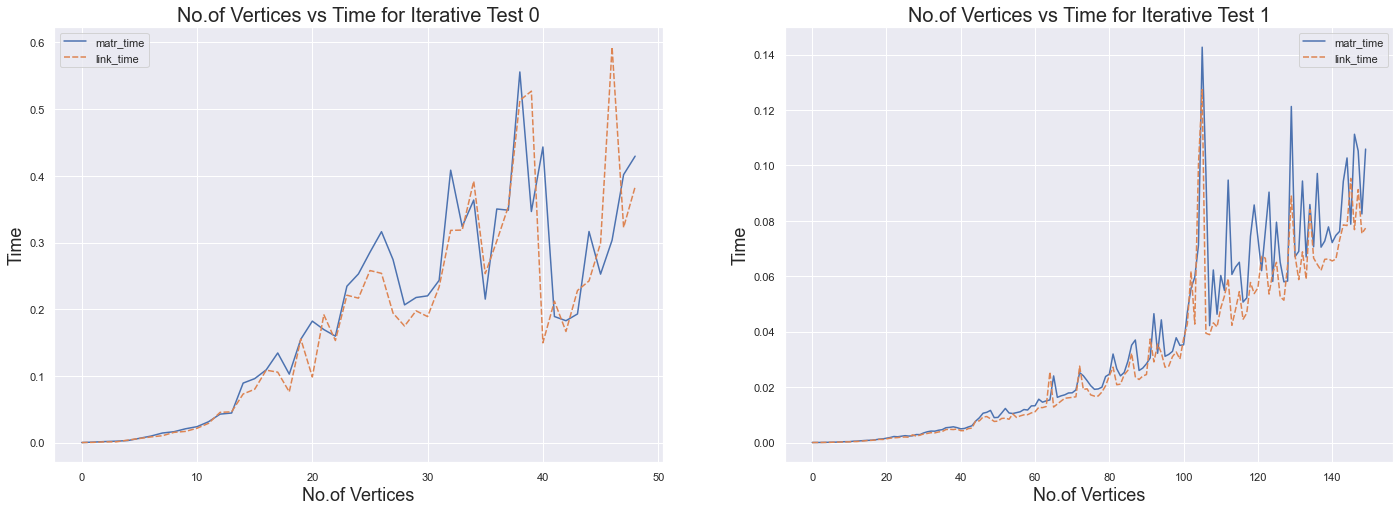

In [ ]:
data_to_plot_0 = pd.DataFrame(iter_results_0[["matr_time", "link_time"]])
data_to_plot_1 = pd.DataFrame(iter_results_1[["matr_time", "link_time"]])
data_to_plot_2 = pd.DataFrame(random_results_0[["matr_time", "link_time"]])
data_to_plot_3 = pd.DataFrame(random_results_1[["matr_time", "link_time"]])


fig, ax = plt.subplots(1,2, figsize = (24, 8))

p1 = sb.lineplot(data = data_to_plot_0, ax = ax[0])
p1.set_title("No.of Vertices vs Time for Iterative Test 0", size = 20)
p1.set_xlabel("No.of Vertices", fontsize = 18)
p1.set_ylabel("Time", fontsize = 18)

p2 = sb.lineplot(data = data_to_plot_1, ax = ax[1])
p2.set_title("No.of Vertices vs Time for Iterative Test 1", size = 20)
p2.set_xlabel("No.of Vertices", fontsize = 18)
p2.set_ylabel("Time", fontsize = 18)

Text(0, 0.5, 'Time')

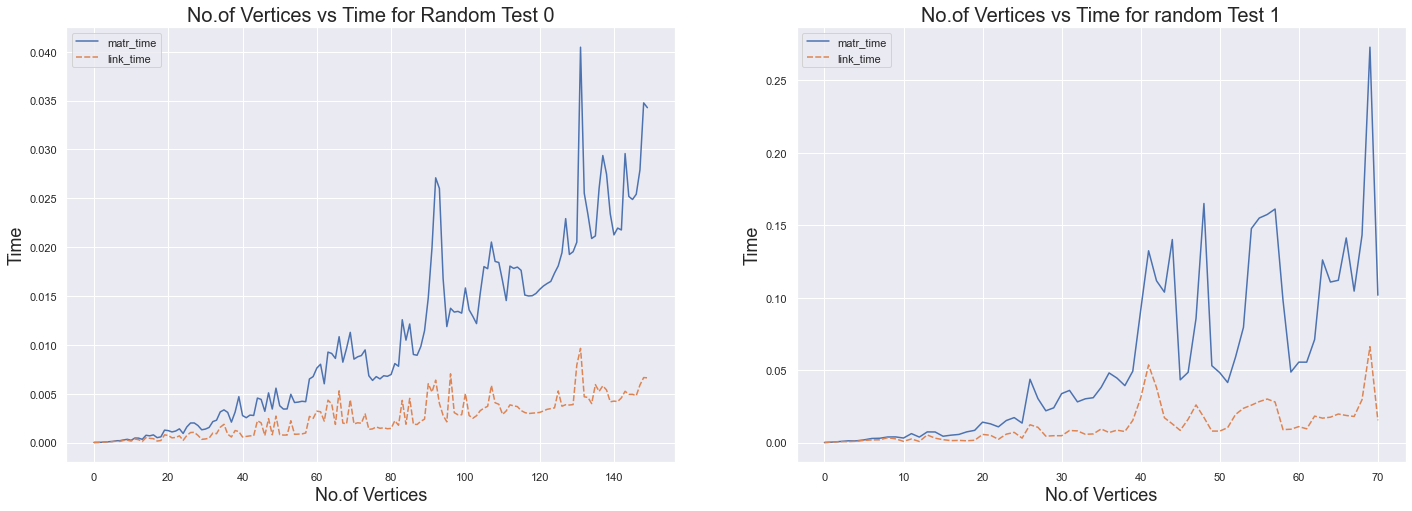

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (24, 8))
p3 = sb.lineplot(data = data_to_plot_2, ax = ax[0])
p3.set_title("No.of Vertices vs Time for Random Test 0", size = 20)
p3.set_xlabel("No.of Vertices", fontsize = 18)
p3.set_ylabel("Time", fontsize = 18)

p4 = sb.linelot(data = data_to_plot_3, ax = ax[1])
p4.set_title("No.of Vertices vs Time for random Test 1", size = 20)
p4.set_xlabel("No.of Vertices", fontsize = 18)
p4.set_ylabel("Time", fontsize = 18)

<BarContainer object of 100 artists>

<Figure size 4000x4000 with 0 Axes>

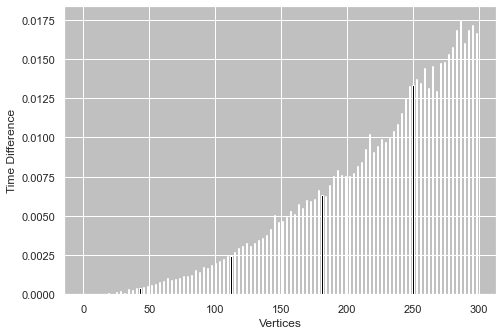

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 200)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(random_results_0["vertices"], random_results_0["time_diff"], color = "black")

<BarContainer object of 165 artists>

<Figure size 6000x6000 with 0 Axes>

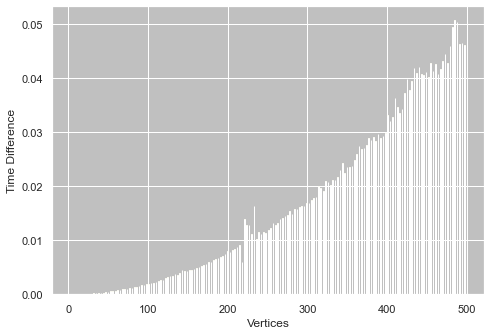

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(random_results_1["vertices"], random_results_1["time_diff"], color = "yellow")

<BarContainer object of 49 artists>

<Figure size 6000x6000 with 0 Axes>

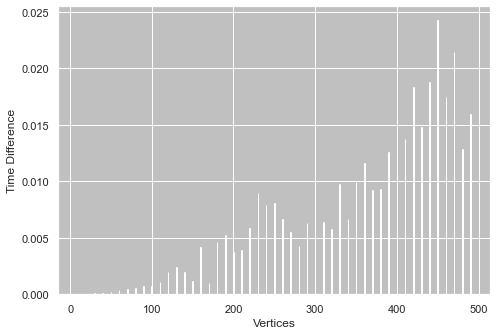

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(iter_results_0["vertices"], iter_results_0["time_diff"], color = "black")

<BarContainer object of 150 artists>

<Figure size 6000x6000 with 0 Axes>

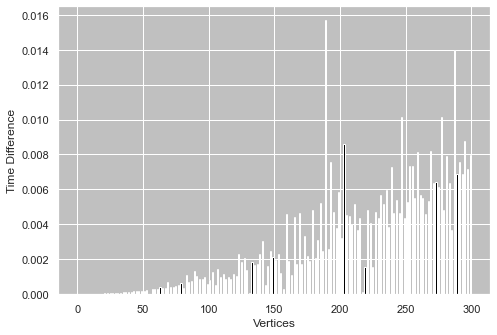

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(iter_results_1["vertices"], iter_results_1["time_diff"], color = "black")

[Text(0, 0.5, 'Time Difference'), Text(0.5, 0, 'Vertices'), []]

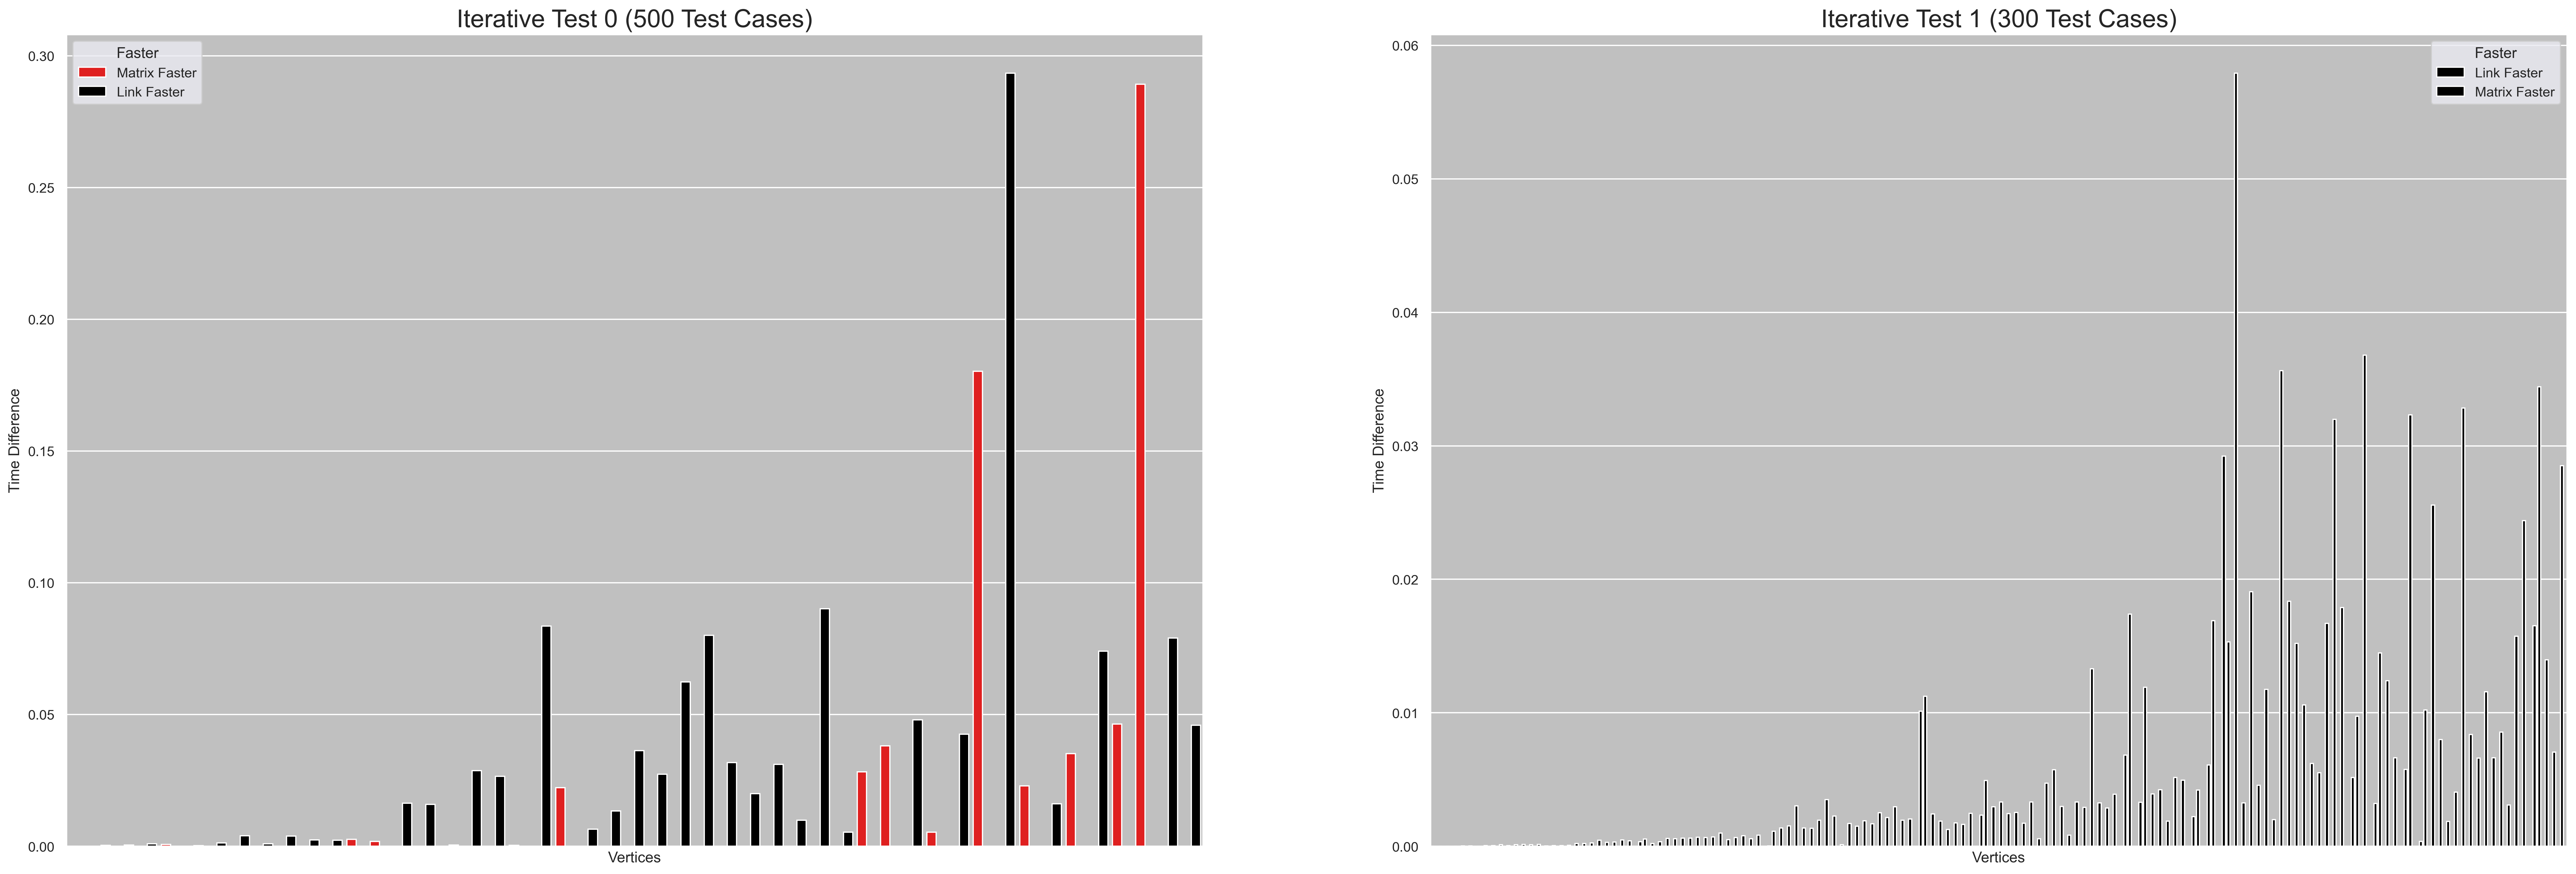

In [277]:
clrs_0 = ['black' if (x == "Link Faster") else 'red' for x in barplot_0["Faster"]]
clrs_1 = ['black' if (x == "Link Faster") else 'red' for x in barplot_1["Faster"]]

fig, ax = plt.subplots(1, 2, figsize = (36, 12), dpi = 300)
b1 = sb.barplot(data = barplot_0, x = "vertices", y = "time_diff", palette = clrs_0, hue = barplot_0["Faster"], ax = ax[0])
b1.set_facecolor("silver")
b1.set_title("Iterative Test 0 (500 Test Cases)", fontsize = 20)
b1.set(ylabel = "Time Difference", xlabel = "Vertices", xticks = ([]))

b2 = sb.barplot(data = barplot_1, x = "vertices", y = "time_diff", palette = clrs_1, hue = barplot_1["Faster"], ax = ax[1])
b2.set_facecolor("silver")
b2.set_title("Iterative Test 1 (300 Test Cases)", fontsize = 20)
b2.set(ylabel = "Time Difference", xlabel = "Vertices", xticks = ([]))

[Text(0.5, 0, 'Time Difference'), Text(0, 0.5, 'Vertices'), []]

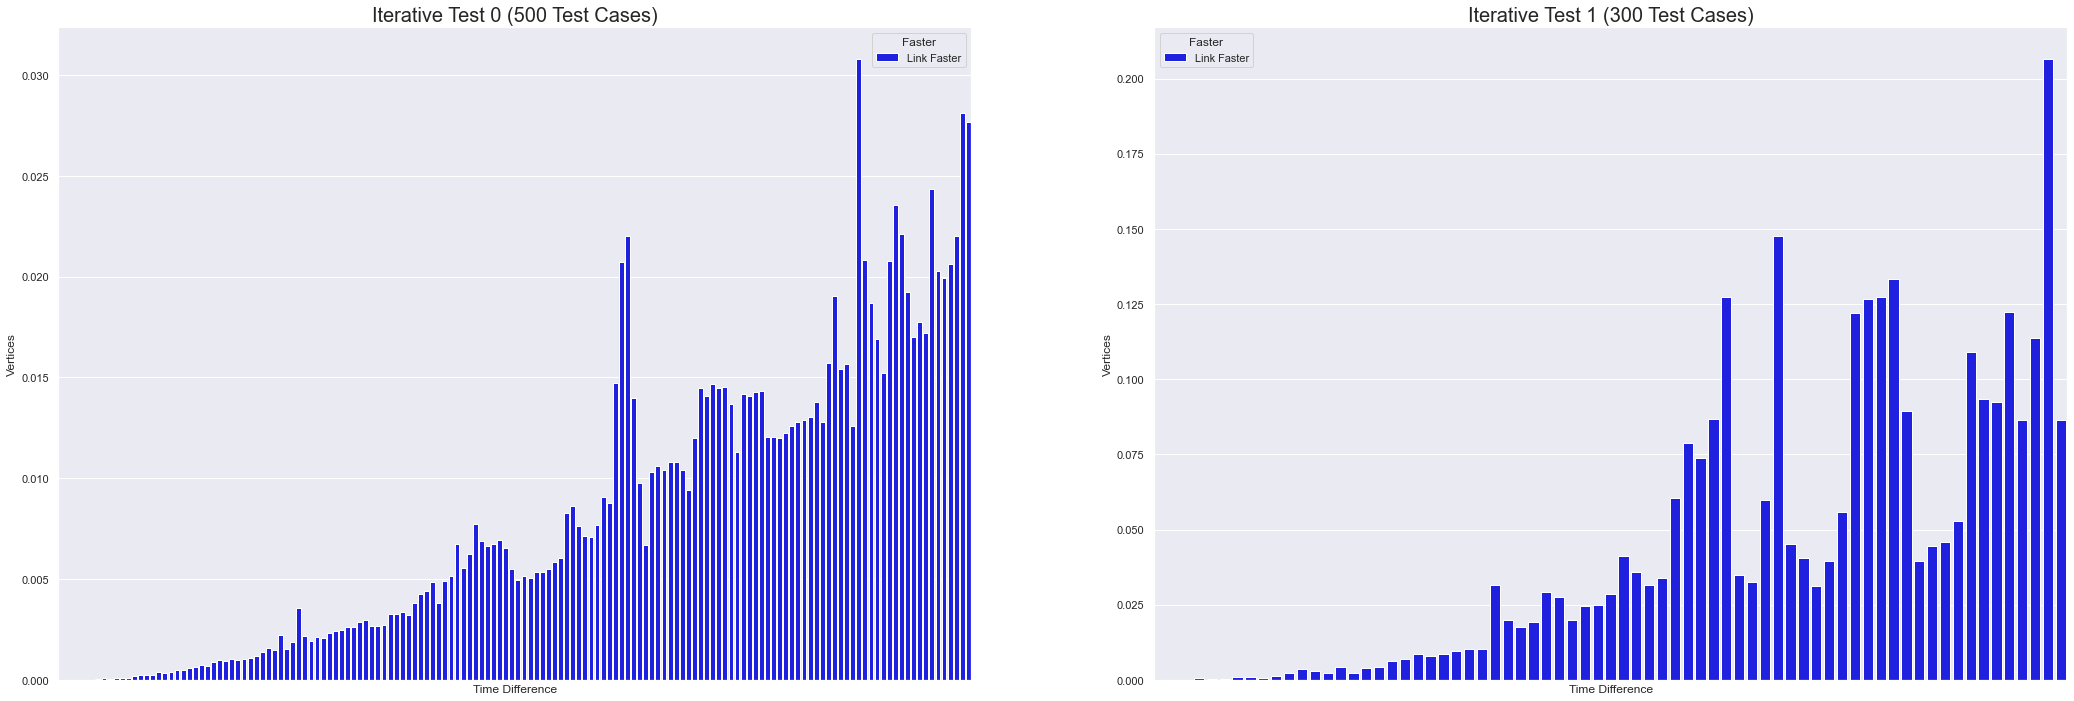

In [282]:
clrs_2 = ['blue' if (x == "Link Faster") else 'red' for x in barplot_2["Faster"]]
clrs_3 = ['blue' if (x == "Link Faster") else 'red' for x in barplot_3["Faster"]]

fig, ax = plt.subplots(1, 2, figsize = (36, 12))
b3 = sb.barplot(data = barplot_2, x = "vertices", y = "time_diff", palette = clrs_2, hue = barplot_2["Faster"], ax = ax[0])
b3.set_title("Iterative Test 0 (500 Test Cases)", fontsize = 20)
b3.set(xlabel = "Time Difference", ylabel = "Vertices", xticks = ([]))

b4 = sb.barplot(data = barplot_3, x = "vertices", y = "time_diff", palette = clrs_3, hue = barplot_3["Faster"], ax = ax[1])
b4.set_title("Iterative Test 1 (300 Test Cases)", fontsize = 20)
b4.set(xlabel = "Time Difference", ylabel = "Vertices", xticks = ([]))

References: 
---
https://www.geeksforgeeks.org/priority-queue-in-python/ 

https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/
